# Optimal path
Load project files and essential libraries

In [10]:
%matplotlib inline
from __future__ import division
from math import ceil

# Graph library
import networkx as nx

# Matplotlib
import matplotlib.pyplot as plt

# Pyalcs project
import sys
sys.path.append('/home/norbert/Projects/pyalcs')

# Custom classes
from alcs.environment.maze import Maze

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

Load maze from file

In [2]:
maze = Maze('mazes/Maze5.maze')

Create unidirected graph object

In [3]:
g = nx.Graph()

Get coordinates of possible nodes coordinates from the maze and add them as **nodes** to graph with custom attributes

In [4]:
for x in range(0, maze.max_x):
    for y in range(0, maze.max_y):
        if maze.is_path(x, y):
            g.add_node((x, y), type='path')
        if maze.is_reward(x,y):
            g.add_node((x, y), type='reward')

For all *path nodes* find neighbours and add them as **edges**:

In [5]:
path_nodes = [cords for cords, attribs in g.nodes(data=True) if attribs['type'] == 'path']

for n in path_nodes:
    neighbour_cells = maze.get_possible_neighbour_cords(*n)
    allowed_cells = [c for c in neighbour_cells if maze.is_path(*c) or maze.is_reward(*c)]
    edges = [(n, dest) for dest in allowed_cells]
    
    g.add_edges_from(edges)

## Visualization

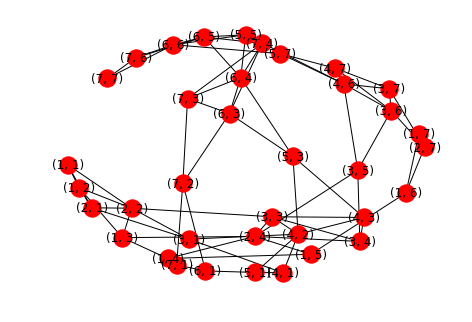

In [6]:
nx.draw(g, with_labels=True)

## Shortest path
Find the shortest path from each node to the reward

In [7]:
reward_node = [cords for cords, attribs in g.nodes(data=True) if attribs['type'] == 'reward'][0]

In [8]:
distances = { pn: nx.shortest_path_length(g, pn, reward_node) for pn in path_nodes }

In [9]:
for node, dist in distances.items():
    print("Shortest distance from node {} is {}".format(node, dist))
    
avg_distance = sum(distances.values()) / len(distances.values())
print("\nAverage distance (ceiling): {}".format(ceil(avg_distance)))

Shortest distance from node (6, 4) is 3
Shortest distance from node (4, 7) is 6
Shortest distance from node (1, 3) is 6
Shortest distance from node (4, 3) is 4
Shortest distance from node (7, 3) is 2
Shortest distance from node (2, 2) is 5
Shortest distance from node (1, 2) is 6
Shortest distance from node (7, 7) is 6
Shortest distance from node (2, 1) is 5
Shortest distance from node (4, 6) is 5
Shortest distance from node (3, 5) is 6
Shortest distance from node (1, 6) is 7
Shortest distance from node (1, 4) is 6
Shortest distance from node (3, 7) is 6
Shortest distance from node (4, 2) is 3
Shortest distance from node (6, 5) is 4
Shortest distance from node (3, 3) is 4
Shortest distance from node (2, 7) is 7
Shortest distance from node (6, 3) is 2
Shortest distance from node (3, 1) is 4
Shortest distance from node (5, 5) is 4
Shortest distance from node (4, 1) is 3
Shortest distance from node (6, 1) is 1
Shortest distance from node (6, 6) is 5
Shortest distance from node (2, 4) is 5
